# Статистика наизусть - 3

В данной статье речь пойдет о проверке гипотезы о разности средних значений для двух выборок и ти-тесте. Начнем с проверки этой гипотезы на больших выборках (n>=30), когда возможно использовать нормальное распределении. Я буду использовать примеры из книги [Доннелли Роберт А. мл. Статистика шаг за шагом](http://www.twirpx.com/file/1179942/)

Представьте себе испытания на крысах. Одну группу крыс ("везунчиков") окружили заботой, давали им хороший сыр (пармезан) и показывали интересные познавательные фильмы. Другую группу ("менее везучие") посадили в скучную клетку, кормили дешевым сыром и показывали новости по первому каналу. После некоторого времени таких испытаний у крыс из каждой группы измерили вес мозга. Получились следующие результаты.

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'Средний вес мозга':[2.4,2.1],
       'Стандартное отклонение выборки':[.6,.8],
      'Размер выборки':[50,60]},index=['Везунчики','Менее везучие'])
df

,Размер выборки,Средний вес мозга,Стандартное отклонение выборки
Везунчики,50,2.4,0.6
Менее везучие,60,2.1,0.8


Нужно проверить гипотезу о том, что мозг везучих крыс (m1) больше мозга менее везучих (m2). Сформулируем нулевую и альтернативную гипотезы:

H0: m1 <= m2 (средний вес мозга везучей крысы меньше или равен среднему весу мозга менее везучей)
<br>H1: m1 > m2 (средний вес мозга везучей крысы больше среднего веса невезучей)</br> 

Гипотезы так же могут выглядеть следующим образом:

H0: m1 - m2 <= 0
<br>H1: m1 - m2 > 0</br>

Проверим эту гипотезу при a = 0.05

Для начала нужно вычислить стандартную ошибку разности двух средних. Делается это так:

$$ se = \sqrt{\frac{s1^2}{n1}+\frac{s2^2}{n2}} $$

In [3]:
from math import sqrt
from __future__ import division
se = sqrt((df['Стандартное отклонение выборки']['Везунчики']**2/
           df['Размер выборки']['Везунчики'])+
         (df['Стандартное отклонение выборки']['Менее везучие']**2/
           df['Размер выборки']['Менее везучие']))
se

0.1336662510384228

Определим z-score для данной разности средних:
$$ z = \frac{(\overline{x1}-\overline{x2}) - (m1-m2)_{H0}}{se} $$

$$где\ \overline{x1},\overline{x2} - средние\ по\ выборкам, $$
$$(m1-m2)_{H0}\ -\ гипотетическая\ разность\ средних\ двух\ совокупностей$$

В нашем случае формула принимет вид:

$$z = \frac{(2.4-2.1) - 0}{0.134} $$

In [4]:
z = (2.4-2.1)/se
z

2.2443960062421726

Осталось посчитать критическое z для a = 0.05 и посмотреть попало ли расчетное z в критическую зону.

In [5]:
from scipy.stats import norm
import numpy as np
x = np.linspace(-3,3,100)
norm_d = norm.pdf(x,0,sqrt(1))
z_c = abs(norm.ppf(.05))
z_c

1.6448536269514729

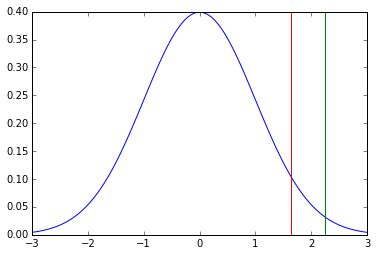

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,norm_d)
plt.axvline(z_c,color='r')
plt.axvline(z,color='g')

Как видно из графика, расчетное значение z попало в критическую зону (справа от красной линии). Следовательно мы отклоняем нулевую гипотезу, и принимает гипотезу о том, что мозг везучих крыс больше мозга невезучих крыс на уровне значимости равном 0.05.

Рассчитаем так же p-value:

In [7]:
1 - norm.cdf(z)

0.012403466626662585

Очень маленькое значение - вероятность нулевой гипотезы очень мала.

Что ж, теперь перейдем к выборкам с n < 30. Какое же распределение использовать? Конечно же распределение Стьюдента! Перейдем к примеру. Представим, что какая-то компания утверждает, что их батарейки работают дольше обычных. Был произведен ряд измерений и получены следующие данные. Срок работы для долговечных батареек:

In [8]:
x1 = [51,44,58,36,48,53,57,40,49,44,60,50]

И для обычных батареек:

In [9]:
x2 = [42,29,51,38,39,44,35,40,48,45]

Гипотеза заключается в том, что новые батарейки работают дольше обычных. Выборки являются независимыми друг от друга. Сформулируем нулевую и альтернативную гипотезы.

H0: m1 <= m2
<br>H1: m1 > m2</br>

m1 - средний срок работы долговечных батареек, m2 - средний срок обычных батареек.

Для начала нужно совместную стандартных отклонений. Если сделать допущение, что стандартные оклонения обеих совокупностей равны, то оценку можно рассчитать следующим образом:

$$s_{p} = \sqrt{\frac{(n_{1}-1)s_{1}^2+(n_{2}-1)s_{2}^2}{n_{1}+n_{2}-2}} $$

In [10]:
s_p = sqrt(((len(x1)-1)*np.std(x1,ddof=1)**2+
            (len(x2)-1)*np.std(x2,ddof=1)**2)/
           (len(x1)+len(x2)-2))
s_p

6.915803158949315

Обратите внимание, что я передал в np.sts параметр ddof. Это дельта степеней свободы: по умолчанию np.std делит n, если поставить ddof=1, то будет делить на (n-1). Когда считаем отклонение по совокупности, то делить надо на (n-1). Теперь можем вычислить стандартную ошибку разности двух средних. Формула следующая:

$$ se = s_{p}\sqrt{\frac{1}{n1}+\frac{1}{n2}} $$

In [11]:
se = s_p*sqrt(1/len(x1)+1/len(x2))
se

2.961170001499032

Далее рассчитаем t-статистику. Формула такая же, как и в случае с нормальным распределением:

$$ t = \frac{(\overline{x1}-\overline{x2}) - (m1-m2)_{H0}}{se} $$

In [12]:
t1 = (np.mean(x1)-np.mean(x2))/se
t1

2.7241484489519605

Теперь получим критическое значение t-статистики для a = 0.01 (я проверяю гипотезу на этом уровне значимости). Вторым аргументом t.ppf принимает степени свободы.

In [13]:
from scipy.stats import t
df = len(x1)+len(x2)-2
t_c = abs(t.ppf(0.01,df))
t_c

2.5279770027405464

Строим график.

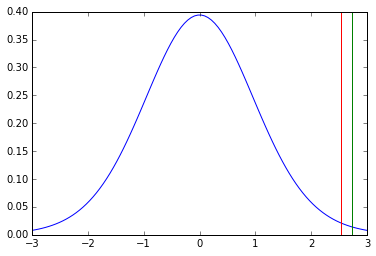

In [14]:
plt.plot(x,t.pdf(x,df))
plt.axvline(t_c,color='r')
plt.axvline(t1,color='g')

Зеленая линия оказалась справа от красной - значит попала в критическую зона, и мы отклоняем нулевую гипотезу и принимаем гипотезу о том, что новые батарейки работаею дольше. Рассчитаем так же p-value.

In [15]:
1 - t.cdf(t1,df)

0.0065339462212693489

Это был знаменитый t-тест. Его же можно провести и встроенным методом scipy.

In [16]:
from scipy.stats import ttest_ind

In [17]:
ts,pv = ttest_ind(x1,x2)
ts,pv

(2.7241484489519605, 0.013067892442538755)

На выходе ttest_ind (ind от independent - независимый; t-тест для независимых выборок) дает значение t-статистики и p-value. t-статистика совпадает с ручными рассчетами, а вот p-value нет. Почему? Потому что встроенный t-тест считает p-value для двух сторонней проверки гипотезы, а мы делали для односторонней. Чтобы получит наше значение нужно полученной разделить на 2.

In [18]:
pv/2

0.0065339462212693775

Так же существует t-test для зависимых выборок. Разберем сразу на примере. Представим, что есть девять игроков в гольф, которым было поручено тестировать новые мячи для гольфа и обычные. Производитель новых мячей утверждает, что эти мячи летят на 20 метров дальше, чем обычные. Было получено две выборки - одна для новых мячей, другая для обычных.

In [19]:
x1 = np.array([215,228,256,264,248,255,239,218,239])
x2 = np.array([201,213,230,233,218,226,212,195,208])

Эти выборки взаимо связаны, т.к. каждый игрок последовательно бил по новому мячу, а потом по старому. Встроенным средствами scipy можно провети тест для зависимых выборок - ttest_rel. Нулевая гипотеза в данном случае это равенство средних по двум выборкам. На выходе дает t-статистику и p-value.

In [20]:
from scipy.stats import ttest_rel
ttest_rel(x1,x2)

Ttest_relResult(statistic=11.506824034107407, pvalue=2.9499114348637115e-06)

p-value получилось очень маленькое, это значит, что мы не принимаем нулевую гипотезу и принимаем гипотезу о разности двух средних. Но как нам проверить гипотезу о том, что новый мяч летит на 20 метров дальше? Очень просто - посчитаем разницу между элементами двух выборок и проверим гипотезу о том, что среднее получившейся выборки (разности) больше 20. Гипотезы сформулируем так: 

H1: m <= 20
<br>H0: m > 20</br>

Рассчитаем t статиску для этой проверки (формулу можно посмотреть в предудущей [статье](http://localhost:8888/notebooks/stats_by_heart2.ipynb)).


In [21]:
x_m = x1 - x2
t1 = (np.mean(x_m)-20)/(np.std(x_m,ddof=1)/sqrt(len(x_m)))
t1

2.3420969272961978

Гипотезу будем проверять на уровне значимости a = 0.05. Рассчитаем критическое значение t-статистики.

In [22]:
t_c = abs(t.ppf(0.05,len(x_m)-1))
t_c

1.8595480375228428

Построим график и посмотрим.

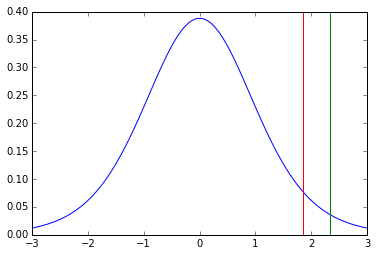

In [23]:
plt.plot(x,t.pdf(x,len(x_m)))
plt.axvline(t_c,color='r')
plt.axvline(t1,color='g')

Зеленая линия справа от красной значит нулевую гипотезу отвергаем и принимаем гипотезу о том, что новый мяч летит на 20 метров дальше обычного.

На сегодня все. В следующем выпуске "Статистики наизусть" я познакомлю вас со статистикой хи-квадрат.